In [62]:
#importing the essental libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras import layers, models, optimizers, callbacks

In [ ]:
from sklearn.datasets import load_breast_cancer

# Reproducible seeds

In [ ]:
cancer = load_breast_cancer()

In [ ]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [63]:
cancer.values()

dict_values([array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [64]:
print(cancer['target'])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
print(cancer['target_names'])

['malignant' 'benign']


In [ ]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
cancer['data'].shape

(569, 30)

In [ ]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'],['target']))

In [ ]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


# *VISUALISING THE DATA*

In [ ]:
sns.pairplot(df_cancer , vars =['mean radius','mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness' ,'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension'])

Output hidden; open in https://colab.research.google.com to view.

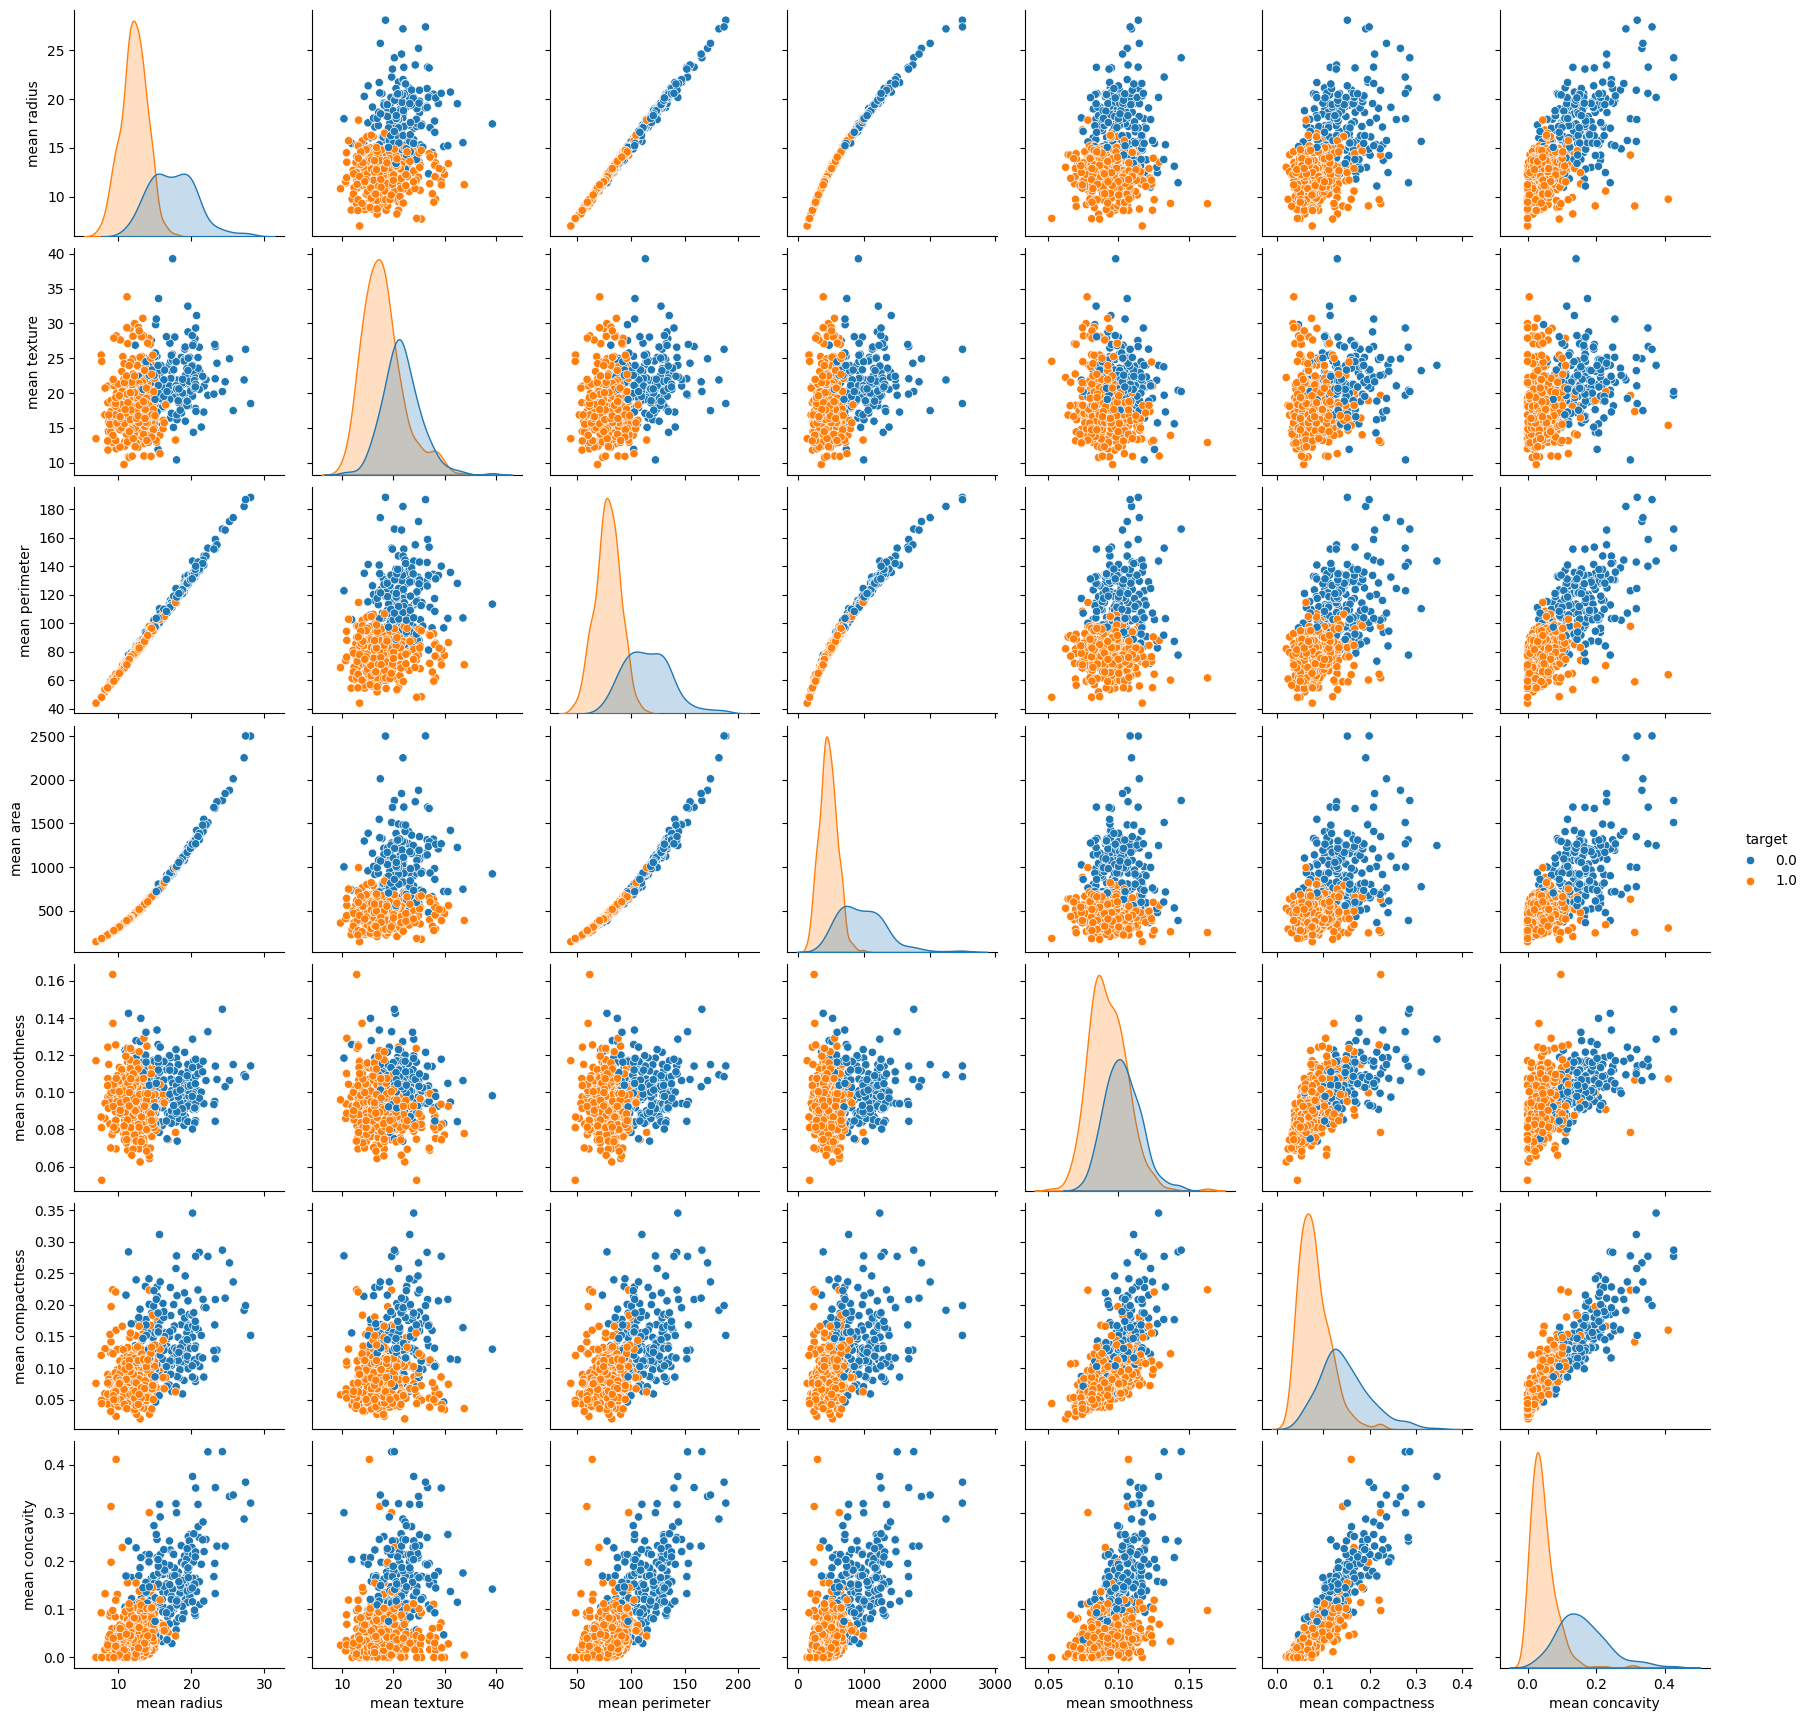

In [ ]:
sns.pairplot(df_cancer ,hue ='target', vars =['mean radius','mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness' ,'mean concavity'])

<Axes: ylabel='count'>

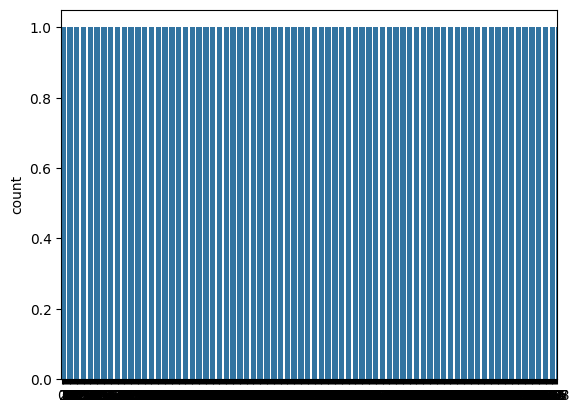

In [ ]:

sns.countplot(df_cancer['target'])

<Axes: xlabel='mean area', ylabel='mean smoothness'>

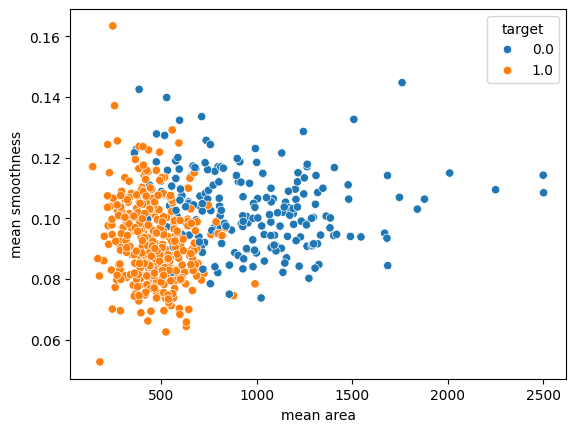

In [ ]:
sns.scatterplot(x='mean area',y='mean smoothness',hue='target',data =df_cancer)

<Axes: >

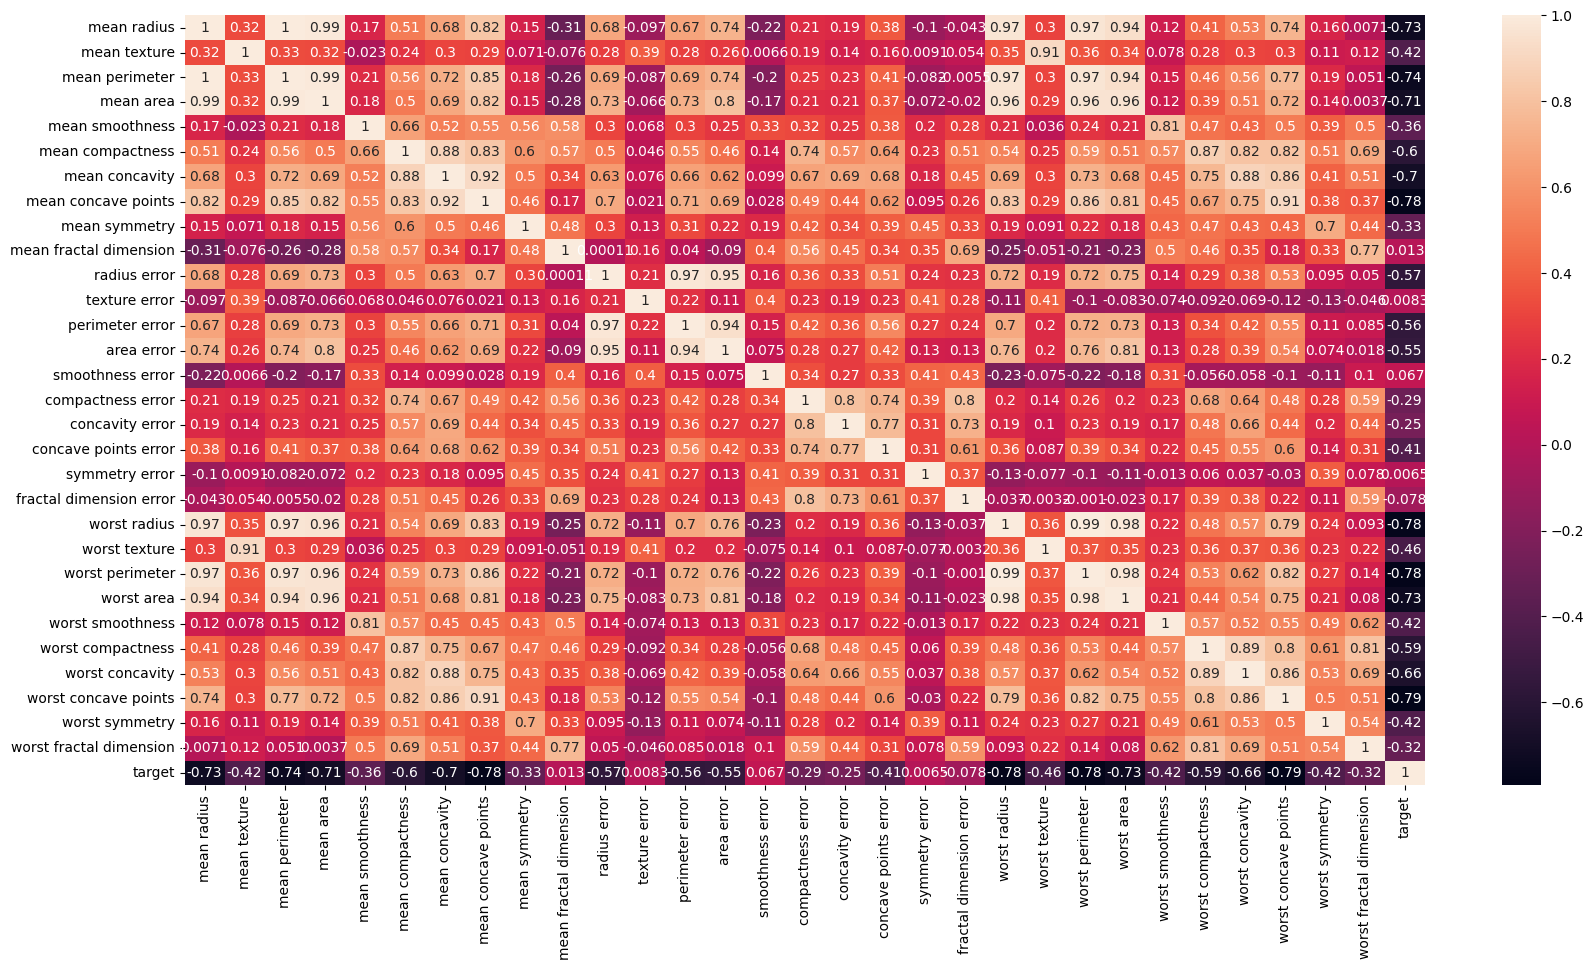

In [ ]:
plt.figure(figsize =(20,10))
sns.heatmap(df_cancer.corr(), annot =True)

# *SPLITTING THE DATASET*

In [ ]:
x = df_cancer.drop(['target'],axis =1)

In [ ]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y= df_cancer['target']

In [ ]:
y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
564,0.0
565,0.0
566,0.0
567,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [ ]:
 x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
47,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.1786,0.4166,0.50060,0.20880,0.3900,0.11790
527,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.04,30.80,113.90,869.3,0.1613,0.3568,0.40690,0.18270,0.3179,0.10550
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.1411,0.3542,0.27790,0.13830,0.2589,0.10300
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.90340,0.19640,0.3245,0.11980
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.1855,0.4925,0.73560,0.20340,0.3274,0.12520


In [ ]:
y_train

,target
47,0.0
527,1.0
435,0.0
21,1.0
554,1.0
...,...
8,0.0
73,0.0
400,0.0
118,0.0


In [ ]:
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.087510,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.1452,0.2338,0.16880,0.08194,0.2268,0.09082
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.057780,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006
361,13.300,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.024240,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.022600,0.1893,0.05886,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.033500,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.19220,0.08449,0.2772,0.08756
448,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.029250,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463
381,11.040,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287


In [ ]:
y_test

,target
28,0.0
163,1.0
123,1.0
361,1.0
549,1.0
...,...
447,1.0
98,1.0
448,1.0
381,1.0


# *TRAINING THE MODEL USING SVM*

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
svc_model= SVC()

In [ ]:
svc_model.fit(x_train,y_train)

SVC()

# *EVALUATING THE MODEL*


In [ ]:
y_predict =svc_model.predict(x_test)

In [ ]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [ ]:
cm = confusion_matrix(y_test,y_predict)

<Axes: >

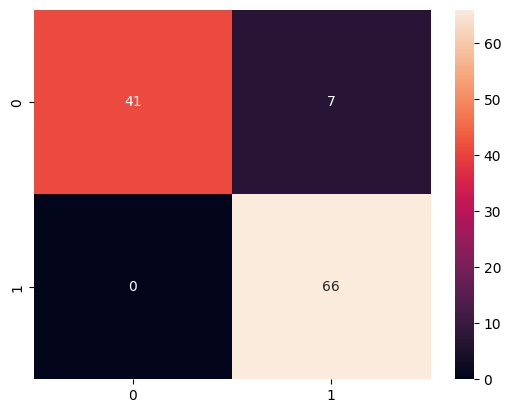

In [ ]:
sns.heatmap(cm ,annot=True)

# Model Improvisation


In [ ]:
min_train =x_train.min()

In [ ]:
range_train =(x_train - min_train).max()

In [ ]:
x_train_scaled =(x_train-min_train)/range_train

<Axes: xlabel='mean area', ylabel='mean smoothness'>

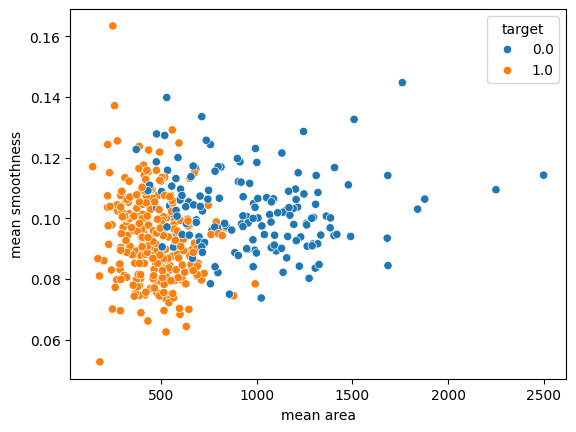

In [ ]:
sns.scatterplot(x = x_train['mean area'], y= x_train['mean smoothness'],hue =y_train)

<Axes: xlabel='mean area', ylabel='mean smoothness'>

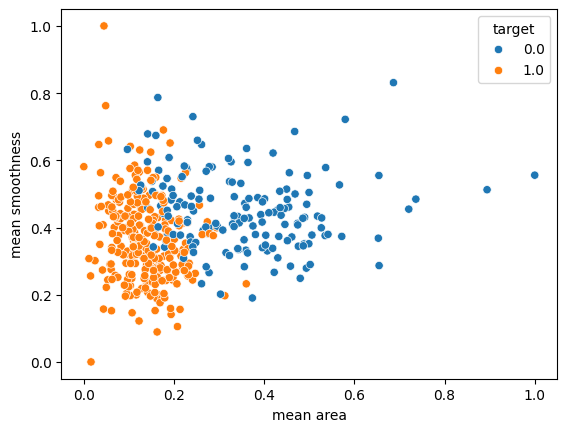

In [ ]:
sns.scatterplot(x = x_train_scaled['mean area'], y= x_train_scaled['mean smoothness'],hue =y_train)

In [ ]:
min_test =x_test.min()
range_test =(x_test - min_test).max()
x_test_scaled =(x_test-min_test)/range_test

In [ ]:
svc_model.fit(x_train_scaled,y_train)

SVC()

In [ ]:
y_predict =svc_model.predict(x_test_scaled)

In [ ]:
cn = confusion_matrix(y_test,y_predict)

<Axes: >

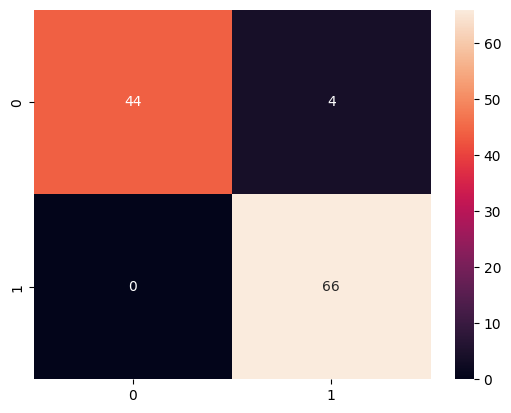

In [ ]:
sns.heatmap(cn,  annot = True)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



### An accuracy of 96% has been achieved after appying the technique of Normalization for Improvisation

In [ ]:
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [ ]:
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid_predictions=grid.predict(x_test_scaled)

In [ ]:
cn =confusion_matrix(y_test,grid_predictions)

<Axes: >

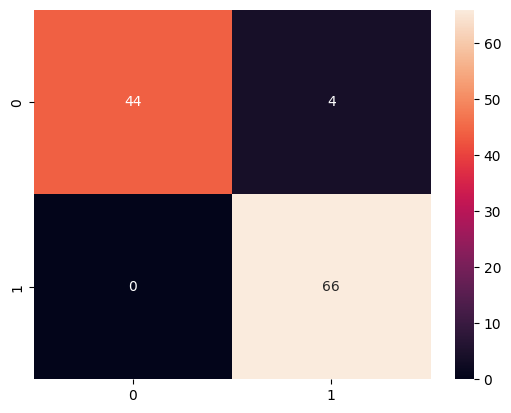

In [ ]:
sns.heatmap(cn , annot =True)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Accuracy of 97% has been achieved by further Improvisation by optimization of C and Gamma Parameters

#NEURAL NETWORK MODEL




 **Neural Network Model 1 : L2 Distance (EUCLIDIEN)**

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1. Wrong scaling method for the data distribution

Some features may not be suitable for:

MinMaxScaler (squashes everything into [0,1])

StandardScaler (mean=0, std=1)

If a feature contains outliers, MinMaxScaler becomes unstable → most values get squeezed into a tiny range → NN can’t learn well.
✔️ Correct: Fit scaler only on training, then transform both

If the scaler is fitted on test data too, the distribution changes → model accuracy drops.

Neural networks usually prefer StandardScaler , not MinMaxScaler.
Why?
MinMaxScaler can create very small gradients → slow/unstable learning.
StandardScaler keeps data centered around zero → helps activation functions (ReLU, tanh) learn better.

In [66]:
nn1 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

N1 — L1 Distance (Manhattan Norm)

Characteristics:

Measures distance by summing absolute differences.

More robust to outliers.

Creates diamond-shaped distance boundaries.

Often leads to simpler, more linear separations.



In [67]:
nn1.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [68]:
y_pred_nn1 = nn1.predict(x_test)
y_prob_nn1 = nn1.predict_proba(x_test)[:, 1]

Print accuracy & reports

In [69]:
print("NN1 Accuracy (Euclidean / L2):", accuracy_score(y_test, y_pred_nn1))

NN1 Accuracy (Euclidean / L2): 0.9473684210526315


An accuracy of 93% has been achieved

In [70]:
print("\nClassification Report NN1:\n", classification_report(y_test, y_pred_nn1))



Classification Report NN1:
               precision    recall  f1-score   support

         0.0       0.96      0.89      0.92        61
         1.0       0.94      0.98      0.96       110

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)



In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize NN1
nn1 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # L2 distance

# Train on scaled data
nn1.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred_nn1 = nn1.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_nn1)
print("NN1 Accuracy (Euclidean / L2) after scaling:", accuracy)


NN1 Accuracy (Euclidean / L2) after scaling: 0.9707602339181286


Confusion Matrix for NN1

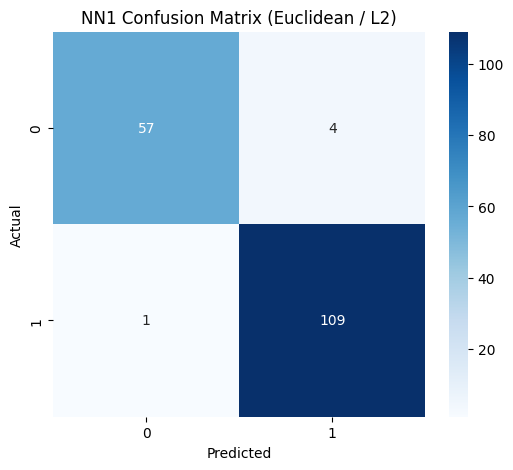

In [73]:
cm1 = confusion_matrix(y_test, y_pred_nn1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("NN1 Confusion Matrix (Euclidean / L2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 **NEURAL NETWORK MODEL 2**

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [75]:
nn2 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

In [76]:
nn2.fit(x_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [77]:
y_pred_nn2 = nn2.predict(x_test)

In [78]:
y_prob_nn2 = nn2.predict_proba(x_test)[:, 1]

EVALUATE THE NN2 MODEL

Print accuracy & reports

In [79]:
print("NN2 Accuracy (Manhattan / L1):", accuracy_score(y_test, y_pred_nn2))

NN2 Accuracy (Manhattan / L1): 0.935672514619883


An accuracy of 93% has been achieved

In [80]:
print("\nClassification Report NN2:\n", classification_report(y_test, y_pred_nn2))



Classification Report NN2:
               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91        61
         1.0       0.94      0.96      0.95       110

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



Confusion Matrix for NN2

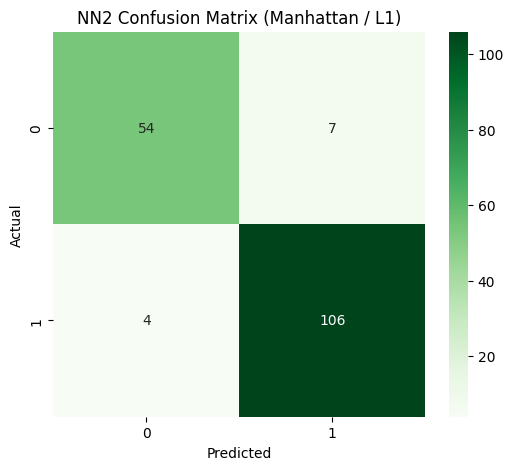

In [81]:
cm2 = confusion_matrix(y_test, y_pred_nn2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("NN2 Confusion Matrix (Manhattan / L1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, auc
)

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [83]:
# ============================================
# 1. PREPROCESSING (RECOMMENDED)
# ============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# ============================================
# 2. MODELS
# ============================================
model_L1 = KNeighborsClassifier(n_neighbors=1, metric="manhattan")
model_L2 = KNeighborsClassifier(n_neighbors=1, metric="euclidean")

model_L1.fit(X_train_scaled, y_train)
model_L2.fit(X_train_scaled, y_train)

y_pred_L1 = model_L1.predict(X_test_scaled)
y_pred_L2 = model_L2.predict(X_test_scaled)

y_prob_L1 = model_L1.predict_proba(X_test_scaled)[:, 1]
y_prob_L2 = model_L2.predict_proba(X_test_scaled)[:, 1]


 METRICS (TPR, FPR, etc.)


In [84]:

def get_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)

    return accuracy, fpr, fnr, tpr, tnr

acc_L2, fpr_L2, fnr_L2, tpr_L2, tnr_L2 = get_metrics(y_test, y_pred_L2)
acc_L1, fpr_L1, fnr_L1, tpr_L1, tnr_L1 = get_metrics(y_test, y_pred_L1)

comparison_table = pd.DataFrame({
    "Metric": ["Accuracy (%)", "FPR (%)", "FNR (%)", "TPR (%)", "TNR (%)"],
    "L1-NN": [acc_L1, fpr_L1, fnr_L1, tpr_L1, tnr_L1],
    "L2-NN": [acc_L2, fpr_L2, fnr_L2, tpr_L2, tnr_L2]
})

print("**L1-NN vs L2-NN Performance Comparison**")
print(comparison_table)

**L1-NN vs L2-NN Performance Comparison**
         Metric     L1-NN     L2-NN
0  Accuracy (%)  0.970760  0.941520
1       FPR (%)  0.049180  0.065574
2       FNR (%)  0.018182  0.054545
3       TPR (%)  0.981818  0.945455
4       TNR (%)  0.950820  0.934426


BAR PLOT – FPR / FNR / TPR / TNR

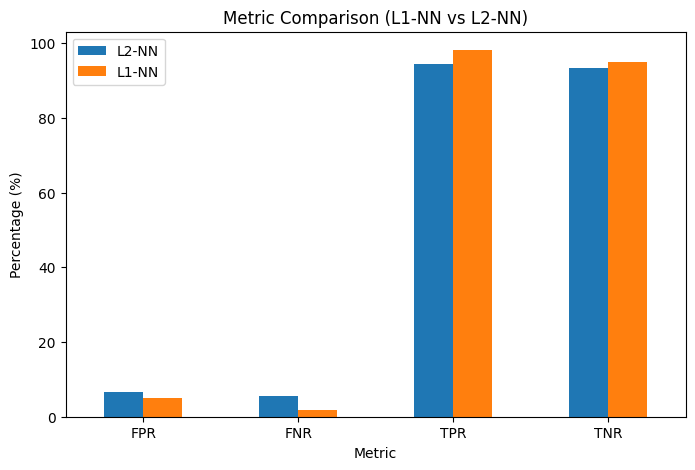

In [85]:

metrics_df = pd.DataFrame({
    "Metric": ["FPR", "FNR", "TPR", "TNR"],
    "L2-NN": [fpr_L2*100, fnr_L2*100, tpr_L2*100, tnr_L2*100],
    "L1-NN": [fpr_L1*100, fnr_L1*100, tpr_L1*100, tnr_L1*100]
})

metrics_df.plot(x="Metric", kind="bar", figsize=(8,5))
plt.ylabel("Percentage (%)")
plt.title("Metric Comparison (L1-NN vs L2-NN)")
plt.xticks(rotation=0)
plt.show()

#  knn Model Improvisation

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_auc_score,
                             roc_curve, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
from imblearn.pipeline import Pipeline as ImbPipeline


 Train/Test Split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)


In [98]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])


Pipeline Setup

In [110]:
from imblearn.over_sampling import SMOTE

# Define whether you want to use SMOTE or not
has_smote = True   # change to False if you don't want SMOTE

if has_smote:
    pipe = ImbPipeline([
        ('scale', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('knn', KNeighborsClassifier())
    ])
else:
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])


SMOTE improves performance on imbalanced datasets.
In an imbalanced dataset:

One class (majority) has many more samples than the other (minority).

Example: 90% class 0, 10% class 1.

If you train a classifier directly:   It may ignore the minority class.

You could get high accuracy but poor F1-score / recall for the minority class.

KNN is particularly sensitive( because it counts neighbors) : if minority class is rare, it may never be selected as a neighbor.

SMOTE creates synthetic examples of the minority class instead of just duplicating them. For each sample in the minority class, SMOTE finds its k nearest neighbors (typically k=5).  
Effect on Neural Networks

Positive effects:

Better class balance → improved learning: NN now sees more minority examples, so it can learn the patterns of that class better.

Higher recall for minority class: The model predicts minority examples more accurately.

Potential improvement in metrics like F1-score, balanced accuracy, and ROC-AUC.

Negative/possible issues:

Overfitting risk: NN may memorize synthetic samples if they are too similar to original minority samples, especially for small datasets.

Noise introduction: If minority class samples are noisy, SMOTE may generate unrealistic synthetic data that confuses the NN.

Marginal effect on accuracy: Overall accuracy m

Hyperparameter Grid

In [112]:
param_grid_nn = {
    'nn__n_neighbors': [1, 3, 5, 7, 9, 11],  # how many neighbors to find
    'nn__metric': ['euclidean', 'manhattan', 'minkowski'],  # distance metric
    'nn__p': [2, 1, 1.5]  # only used if metric='minkowski'
}


In [113]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Hyperparameter Grid

In [118]:
grid = GridSearchCV(pipe, param_grid_nn, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


ValueError: Invalid parameter 'nn' for estimator Pipeline(steps=[('scale', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

 Evaluate on Test Set

In [103]:
best = grid.best_estimator_
y_pred = best.predict(X_test)
y_prob = best.predict_proba(X_test)[:, 1] if hasattr(best, "predict_proba") else None


9️⃣ Confusion Matrix + Derived Metrics

In [104]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Suppose y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0

# Create DataFrame for display
metrics_table = pd.DataFrame({
    "Metric": ["Accuracy", "FPR", "FNR", "TPR", "TNR"],
    "Value": [accuracy, fpr, fnr, tpr, tnr]
})

# Convert to percentages
metrics_table["Value (%)"] = metrics_table["Value"] * 100

# Display nicely
print(metrics_table)



     Metric     Value   Value (%)
0  Accuracy  0.959064   95.906433
1       FPR  0.109375   10.937500
2       FNR  0.000000    0.000000
3       TPR  1.000000  100.000000
4       TNR  0.890625   89.062500


ROC Curve

In [105]:
plt.plot(fpr_vals, tpr_vals, label=f"KNN (AUC={auc_val:.3f})")
plt.plot([0,1],[0,1],'k--')


NameError: name 'fpr_vals' is not defined

Confusion Matrix Heatma

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


k vs Accuracy Plot

In [ ]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    scores = cross_val_score(Pipeline([('scale', StandardScaler()), ('knn', knn)]), x, y, cv=cv)


ALAA

In [ ]:
import numpy as np
import tensorflow as tf
import random
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras import layers, models, optimizers, callbacks

In [ ]:
# Reproducible seeds
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# === Hyperparameters ===
# Shared / required
BATCH_SIZE = 128
EPOCHS = 3000

In [ ]:
# GRU-SVM hyperparams
GRU_CELL_SIZE = 128
GRU_DROPOUT = 0.5
GRU_LR = 1e-3
SVM_C = 5.0
SVM_KERNEL = 'rbf'  # default (change if you used linear)

In [ ]:
# MLP hyperparams
MLP_HIDDEN = [500, 500, 500]
MLP_LR = 1e-2

In [ ]:
# === Load & preprocess ===
data = load_breast_cancer()
X = data.data      # shape (569, 30)
y = data.target    # 0/1

In [ ]:
# Standardize (you indicated StandardScaler() was used)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train/test split 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=SEED, stratify=y)


In [ ]:
print("Shapes: X_train", X_train.shape, "X_test", X_test.shape)

# === Helper: metrics function ===
def compute_binary_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    # cm layout: [[TN, FP], [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    acc = (TP + TN) / (TP + TN + FP + FN)
    # Avoid division by zero
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0  # recall/sensitivity
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0.0  # specificity
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0.0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0.0
    return {"accuracy": acc, "TPR": TPR, "TNR": TNR, "FPR": FPR, "FNR": FNR, "cm": cm}


**GRU PIPELINE**

In [ ]:
# === GRU-SVM pipeline ===
# reshape features to (timesteps=30, features=1)
X_train_seq = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build GRU encoder model to extract embeddings
def build_gru_encoder(cell_size=GRU_CELL_SIZE, dropout_rate=GRU_DROPOUT, lr=GRU_LR):
    inp = layers.Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
    x = layers.GRU(cell_size, return_sequences=False)(inp)  # final state
    x = layers.Dropout(dropout_rate)(x)
    # optional small dense projection to embeddings (keeps representation size manageable)
    emb = layers.Dense(cell_size, activation='relu', name='embedding')(x)
    model = models.Model(inputs=inp, outputs=emb)
    opt = optimizers.Adam(learning_rate=lr)
    # We'll compile with a temporary binary head to train encoder representations
    out = layers.Dense(1, activation='sigmoid', name='tmp_out')(emb)
    train_model = models.Model(inputs=inp, outputs=out)
    train_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model, train_model

gru_encoder, gru_train_model = build_gru_encoder()

In [ ]:
# Train the GRU model as a representation learner (temporary binary head)
print("Training GRU encoder (representation learning). This may take a while for 3000 epochs...")
gru_history = gru_train_model.fit(
    X_train_seq, y_train,
    validation_data=(X_test_seq, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=0  # set to 1 to monitor epochs
)

In [ ]:
# After training, extract embeddings for train & test via the encoder's 'embedding' layer
# We'll rebuild an encoder up to 'embedding' using the trained weights
# Find the embedding layer weights in train_model
embed_layer = gru_train_model.get_layer('embedding')
# Create a model mapping inputs to embedding outputs
encoder = models.Model(inputs=gru_train_model.input, outputs=embed_layer.output)
X_train_emb = encoder.predict(X_train_seq, batch_size=BATCH_SIZE)
X_test_emb  = encoder.predict(X_test_seq, batch_size=BATCH_SIZE)

print("Embeddings shapes:", X_train_emb.shape, X_test_emb.shape)

In [ ]:
# Train SVM on embeddings
svc = SVC(C=SVM_C, kernel=SVM_KERNEL, random_state=SEED)
svc.fit(X_train_emb, y_train)
y_pred_svm = svc.predict(X_test_emb)

metrics_gru_svm = compute_binary_metrics(y_test, y_pred_svm)
metrics_gru_svm["datapoints"] = BATCH_SIZE * EPOCHS  # matches your report: batch*epochs
metrics_gru_svm["epochs"] = EPOCHS

print("GRU-SVM results:")
print(metrics_gru_svm)

**MLP PIPELINE**

In [ ]:
# === MLP pipeline (Keras feed-forward) ===
def build_mlp(input_dim, hidden_layers=MLP_HIDDEN, lr=MLP_LR):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for units in hidden_layers:
        model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    opt = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp_model = build_mlp(input_dim=X_train.shape[1])
print("Training MLP (this may take a while for 3000 epochs)...")
mlp_history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=0
)

y_pred_mlp = (mlp_model.predict(X_test, batch_size=BATCH_SIZE) > 0.5).astype(int).flatten()
metrics_mlp = compute_binary_metrics(y_test, y_pred_mlp)

In [ ]:
# If you want datapoints analogous to your report, it's also batch*epochs (or training samples * epochs)
metrics_mlp["datapoints"] = BATCH_SIZE * EPOCHS
metrics_mlp["epochs"] = EPOCHS

print("MLP results:")
print(metrics_mlp)

In [ ]:
# === Print nicely ===
import pandas as pd
print("\nGRU-SVM Summary:")
for k,v in metrics_gru_svm.items():
    if k!='cm':
        print(f"  {k}: {v}")
print("Confusion matrix:\n", metrics_gru_svm["cm"])

print("\nMLP Summary:")
for k,v in metrics_mlp.items():
    if k!='cm':
        print(f"  {k}: {v}")
print("Confusion matrix:\n", metrics_mlp["cm"])